In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Datasets for the 5 cities

In [2]:


A_data=pd.read_csv("khammam_hw.csv")
print("The dataset for the required city is:")
A_data

The dataset for the required city is:


,YEAR,MO,DY,T2M,QV2M
0,2016,1,1,24.26,9.70
1,2016,1,2,24.05,9.46
2,2016,1,3,24.11,9.77
3,2016,1,4,23.80,9.09
4,2016,1,5,23.83,9.89
...,...,...,...,...,...
2552,2022,12,27,23.92,16.05
2553,2022,12,28,24.27,15.99
2554,2022,12,29,24.17,14.95
2555,2022,12,30,23.44,13.06


In [3]:
'''Function to predict heat wave
        0-No heat wave
        1-Mild heat wave
        2-Intense heat wave'''

def Heat_wave_pred(df):
    L=[]
    mean=df.mean()
    for i in df:
        if i-mean>=4.5 and i-mean<6.4:
            L.append(1)
        elif i-mean>6.4:
            L.append(2)
        elif i>=45:
            L.append(1)
        elif i>=47:
            L.append(2)
        else:
            L.append(0)
    return L
#A_data["HWP"]=Heat_wave_pred(A_data["T2M"])

In [4]:
#Converting the year month and day columns to datetime data type

L=[]
l=[]
for i in range(2557):
    L.append(str(A_data["DY"][i])+"  "+str(A_data["MO"][i])+"  "+str(A_data["YEAR"][i]))
    l.append(i)
A_data["Date"]=L
A_data["Index"]=l
A_data['Date'] =  A_data["Date"].apply(pd.to_datetime,infer_datetime_format=True)
A_data["Date"]

0      2016-01-01
1      2016-02-01
2      2016-03-01
3      2016-04-01
4      2016-05-01
          ...    
2552   2022-12-27
2553   2022-12-28
2554   2022-12-29
2555   2022-12-30
2556   2022-12-31
Name: Date, Length: 2557, dtype: datetime64[ns]

In [5]:
A_data_test=A_data[["Date","T2M"]]
A_data_test.set_index("Date",inplace=True)
A_data_test

,T2M
Date,
2016-01-01,24.26
2016-02-01,24.05
2016-03-01,24.11
2016-04-01,23.80
2016-05-01,23.83
...,...
2022-12-27,23.92
2022-12-28,24.27
2022-12-29,24.17


# Printing the dataset

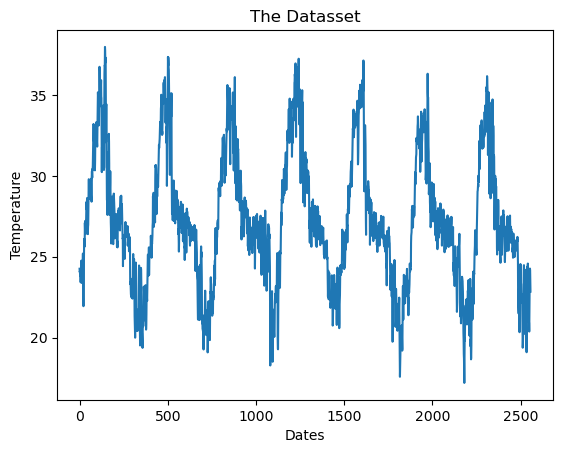

In [6]:
plt.title("The Datasset")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(np.array(A_data["Index"]),np.array(A_data["T2M"]))

# Splitting in test adn training dataset

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
train=A_data_test.iloc[:-30]
test=A_data_test.iloc[-30:]

In [8]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(A_data_test)
print("The p-value of the dataset is:",dfa[1])

The p-value of the dataset is: 0.01818044236298841


In [9]:
#pip install pmdarima

In [10]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(A_data_test["T2M"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6314.045, Time=5.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6454.819, Time=0.71 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6434.306, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6427.435, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6452.820, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6317.333, Time=3.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6312.052, Time=2.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6420.120, Time=1.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6389.810, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6314.046, Time=3.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6368.577, Time=0.73 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6316.018, Time=2.99 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6310.055, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6418.121, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2557
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3151.028
Date:                Sat, 04 Mar 2023   AIC                           6310.055
Time:                        18:54:57   BIC                           6333.440
Sample:                             0   HQIC                          6318.535
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8818      0.030     29.520      0.000       0.823       0.940
ar.L2         -0.2057      0.016    -13.188      0.000      -0.236      -0.175
ma.L1         -0.8150      0.029    -28.004      0.000      -0.872      -0.758
sigma2         0.6891      0.012     58.538      0.000       0.666       0.712
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1553.88
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.82
Prob(H) (two-sided):                  0.59   Kurtosis:                         6.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The training data is:


,T2M
Date,
2016-01-01,24.26
2016-02-01,24.05
2016-03-01,24.11
2016-04-01,23.80
2016-05-01,23.83
...,...
2022-11-27,20.64
2022-11-28,20.35
2022-11-29,20.23


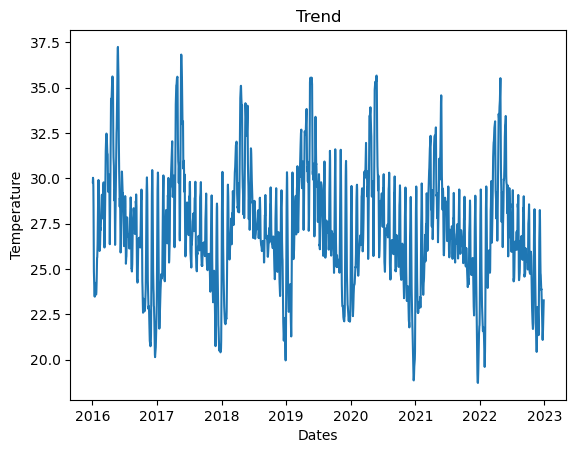

In [11]:
A_data_test.sort_index(inplace=True)
decompose = seasonal_decompose(A_data_test)
trend=decompose.trend
seasonal=decompose.seasonal
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Trend")
plt.plot(trend)
print("The training data is:")
train

In [12]:
from statsmodels.tsa.arima.model import ARIMA 
model =ARIMA(train,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2527
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3143.121
Date:                          Sat, 04 Mar 2023   AIC                           6298.243
Time:                                  18:58:41   BIC                           6333.177
Sample:                                       0   HQIC                          6310.927
                                         - 2527                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8674      0.032     27.381      0.000       0.805       0.930
ar.L2         -0.1992      0.016    -12.448      0.000      -0.231      -0.168
ma.L1         -0.8097      0.030    -26.624      0.000      -0.869      -0.750
ar.S.L30       0.0200      0.019      1.071      0.284      -0.017       0.057
ma.S.L30      -0.9994      0.340     -2.943      0.003      -1.665      -0.334
sigma2         0.6896      0.231      2.983      0.003       0.236       1.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1328.61
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.78
Prob(H) (two-sided):                  0.80   Kurtosis:                         6.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Predicted values for the month of December 2022')

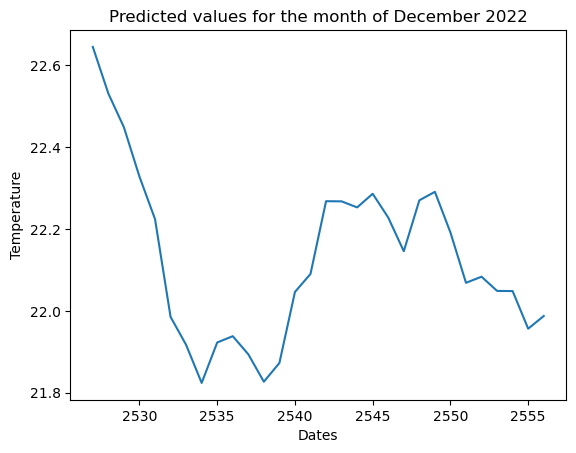

In [13]:
starts=len(train)
ends=len(train)+len(test)-1
pred=model_fit.predict(start=starts,end=ends,typ='levels')
plt.plot(pred)
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Predicted values for the month of December 2022")

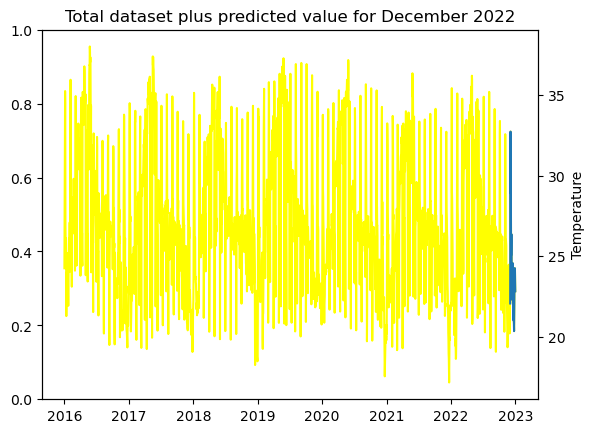

In [14]:
res=pd.DataFrame(pred)
res.columns=["T2M"]
final_data =pd.DataFrame(train)
pred_data=final_data.append(res)
fig,ax1=plt.subplots()
ax2=ax1.twinx()
#curve1=ax1.plot(pred_data,label='predicted Temp',color='black')
curve2=ax2.plot(A_data_test,label="Actual Temp",color='yellow')
plt.plot(A_data_test[-30:])
#plt.plot(pred)
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.title("Total dataset plus predicted value for December 2022")
plt.plot()
plt.show()

# Performance of the model

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
L=[]
for i in pred:
    L.append(i)
l=list(test["T2M"])
rmse=sqrt(mean_squared_error(pred,test["T2M"]))
ame=mean_absolute_error(pred,test["T2M"])
print("Average Temperature         : ",A_data_test['T2M'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  27.258283144309928
Root mean Square value      :  1.6175952259601838
Mean absolute Error         :  1.44896492707077


# Forecasting for the year 2023

# Predictions for January

In [17]:
#Since Jan has 31 days we use 31 in seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. Jan 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2557
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5492.111
Date:                          Sat, 04 Mar 2023   AIC                          10996.222
Time:                                  19:38:27   BIC                          11031.226
Sample:                              01-01-2016   HQIC                         11008.924
                                   - 12-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6539      0.017     39.364      0.000       0.621       0.686
ar.L2         -0.0596      0.017     -3.502      0.000      -0.093      -0.026
ma.L1         -0.9515      0.007   -142.204      0.000      -0.965      -0.938
ar.S.L31       0.5183      0.016     32.154      0.000       0.487       0.550
ma.S.L31      -0.9998      1.253     -0.798      0.425      -3.455       1.456
sigma2         4.3559      5.423      0.803      0.422      -6.273      14.985
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5016.42
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.23
Prob(H) (two-sided):                  0.08   Kurtosis:                         9.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of Jan 2023 is:",pred_new)

The predicted Temperature values of each day of Jan 2023 is: 2023-01-01    23.509919
2023-01-02    23.026132
2023-01-03    26.947476
2023-01-04    28.419285
2023-01-05    26.535447
2023-01-06    26.840268
2023-01-07    24.743404
2023-01-08    25.306847
2023-01-09    25.377267
2023-01-10    25.064950
2023-01-11    23.110309
2023-01-12    23.794705
2023-01-13    24.052931
2023-01-14    24.249761
2023-01-15    23.952640
2023-01-16    24.378700
2023-01-17    24.070744
2023-01-18    23.170414
2023-01-19    22.470457
2023-01-20    22.906008
2023-01-21    22.559082
2023-01-22    22.304187
2023-01-23    22.027265
2023-01-24    21.805049
2023-01-25    22.421588
2023-01-26    23.142680
2023-01-27    23.959617
2023-01-28    24.013399
2023-01-29    23.979562
2023-01-30    23.522686
2023-01-31    23.214727
Freq: D, Name: predicted_mean, dtype: float64


In [19]:
#Combining the pred Jan2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

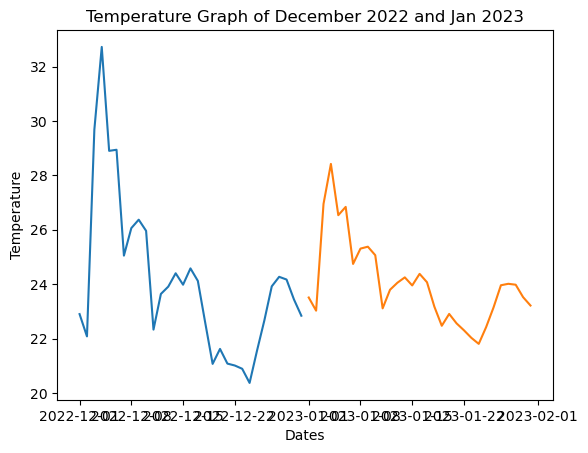

In [20]:
plt.title("Temperature Graph of December 2022 and Jan 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

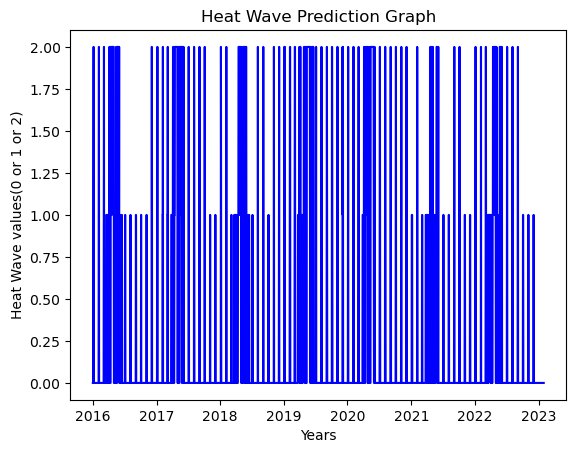

In [21]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [22]:
pred_data_Jan

,T2M,HWP
2016-01-01,24.260000,0
2016-01-02,26.720000,0
2016-01-03,28.630000,0
2016-01-04,32.230000,1
2016-01-05,35.230000,2
...,...,...
2023-01-27,23.959617,0
2023-01-28,24.013399,0
2023-01-29,23.979562,0
2023-01-30,23.522686,0


In [23]:
#Updating the original dataset to the combined data

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-01-27,23.959617
2023-01-28,24.013399
2023-01-29,23.979562
2023-01-30,23.522686
2023-01-31,23.214727


# Predictions for February

In [24]:
#Since Feb has 28 days we use 28 in seasonal order as we need 28 outputs and we need to forecast the next 28 days ie. Feb 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,28))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2588
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 28)   Log Likelihood               -5855.326
Date:                          Sat, 04 Mar 2023   AIC                          11722.652
Time:                                  19:40:40   BIC                          11757.737
Sample:                              01-01-2016   HQIC                         11735.374
                                   - 01-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8622      0.016     54.046      0.000       0.831       0.893
ar.L2         -0.2385      0.019    -12.745      0.000      -0.275      -0.202
ma.L1         -0.9476      0.008   -116.100      0.000      -0.964      -0.932
ar.S.L28       0.0009      0.019      0.048      0.962      -0.037       0.039
ma.S.L28      -0.9989      0.146     -6.822      0.000      -1.286      -0.712
sigma2         5.4159      0.791      6.851      0.000       3.866       6.965
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              3168.87
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.56
Prob(H) (two-sided):                  0.09   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
pred_new =model_fit.forecast(28)
print("The predicted Temperature values of each day of Feb 2023 are:",pred_new)

The predicted Temperature values of each day of Feb 2023 are: 2023-02-01    23.231205
2023-02-02    23.205572
2023-02-03    22.889492
2023-02-04    22.774520
2023-02-05    22.608265
2023-02-06    22.358600
2023-02-07    22.382840
2023-02-08    22.109670
2023-02-09    22.054251
2023-02-10    22.180080
2023-02-11    22.223061
2023-02-12    22.335135
2023-02-13    22.655223
2023-02-14    22.698019
2023-02-15    23.051684
2023-02-16    23.455960
2023-02-17    23.371506
2023-02-18    23.865061
2023-02-19    23.744046
2023-02-20    23.862039
2023-02-21    23.984797
2023-02-22    24.057946
2023-02-23    24.195990
2023-02-24    24.196002
2023-02-25    24.361761
2023-02-26    24.062182
2023-02-27    23.774070
2023-02-28    23.982917
Freq: D, Name: predicted_mean, dtype: float64


In [26]:
#Combining the pred Feb2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

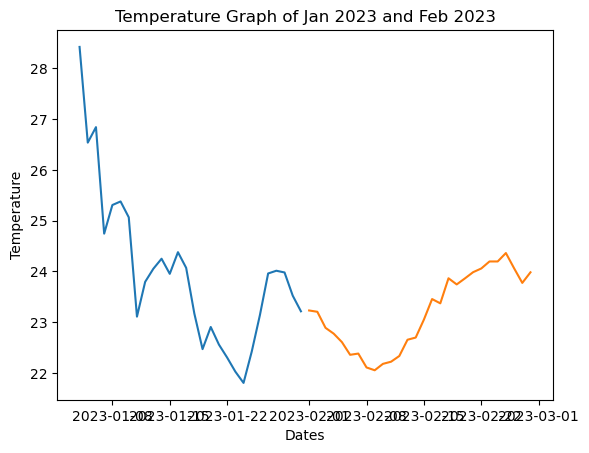

In [27]:
plt.title("Temperature Graph of Jan 2023 and Feb 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-28:])
plt.plot(pred_data[-28:])

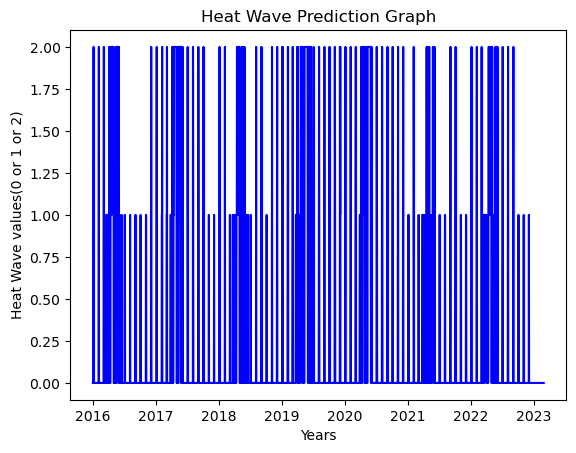

In [28]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [29]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-02-24,24.196002
2023-02-25,24.361761
2023-02-26,24.062182
2023-02-27,23.774070
2023-02-28,23.982917


# Predictions for March

In [30]:
#Since March has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. March 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2616
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5592.096
Date:                          Sat, 04 Mar 2023   AIC                          11196.192
Time:                                  19:48:24   BIC                          11231.334
Sample:                              01-01-2016   HQIC                         11208.929
                                   - 02-28-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6560      0.016     40.347      0.000       0.624       0.688
ar.L2         -0.0594      0.017     -3.569      0.000      -0.092      -0.027
ma.L1         -0.9518      0.007   -145.686      0.000      -0.965      -0.939
ar.S.L31       0.5161      0.016     32.845      0.000       0.485       0.547
ma.S.L31      -0.9999      1.910     -0.523      0.601      -4.743       2.744
sigma2         4.2632      8.110      0.526      0.599     -11.633      20.159
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5427.40
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.23
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-03-01    23.866156
2023-03-02    23.456174
2023-03-03    23.244715
2023-03-04    23.135316
2023-03-05    23.206231
2023-03-06    23.072364
2023-03-07    22.939827
2023-03-08    22.980575
2023-03-09    23.141040
2023-03-10    23.092802
2023-03-11    22.988498
2023-03-12    22.871074
2023-03-13    22.841216
2023-03-14    22.803444
2023-03-15    22.864101
2023-03-16    23.149092
2023-03-17    23.113866
2023-03-18    23.223435
2023-03-19    23.548440
2023-03-20    23.436813
2023-03-21    23.600972
2023-03-22    23.623301
2023-03-23    23.832246
2023-03-24    23.832325
2023-03-25    23.655343
2023-03-26    23.516939
2023-03-27    23.565288
2023-03-28    23.653987
2023-03-29    23.631314
2023-03-30    23.642457
2023-03-31    23.625727
Freq: D, Name: predicted_mean, dtype: float64


In [32]:
#Combining the pred March2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

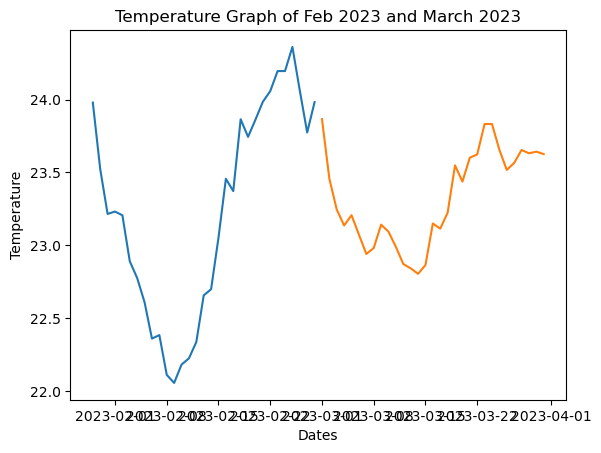

In [33]:
plt.title("Temperature Graph of Feb 2023 and March 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

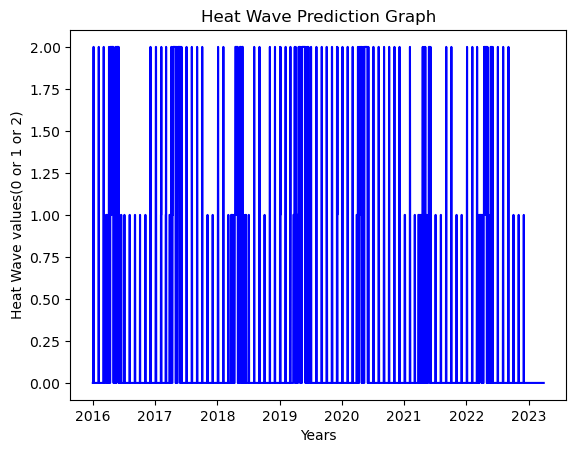

In [34]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [35]:

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-03-27,23.565288
2023-03-28,23.653987
2023-03-29,23.631314
2023-03-30,23.642457
2023-03-31,23.625727





# Predictions of April

In [36]:
#Since April has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. April 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2647
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -5755.590
Date:                          Sat, 04 Mar 2023   AIC                          11523.181
Time:                                  19:51:49   BIC                          11558.397
Sample:                              01-01-2016   HQIC                         11535.936
                                   - 03-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6516      0.015     43.183      0.000       0.622       0.681
ar.L2         -0.0674      0.020     -3.331      0.001      -0.107      -0.028
ma.L1         -0.9517      0.007   -131.991      0.000      -0.966      -0.938
ar.S.L30       0.4451      0.013     34.448      0.000       0.420       0.470
ma.S.L30      -0.9999      2.458     -0.407      0.684      -5.817       3.817
sigma2         4.5783     11.247      0.407      0.684     -17.465      26.622
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4535.25
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of April 2023 are:",pred_new)
    

The predicted Temperature values of each day of April 2023 are: 2023-04-01    23.400990
2023-04-02    23.417839
2023-04-03    23.479217
2023-04-04    23.408759
2023-04-05    23.107853
2023-04-06    22.823215
2023-04-07    22.911676
2023-04-08    23.096725
2023-04-09    23.065135
2023-04-10    22.929117
2023-04-11    22.783125
2023-04-12    22.938773
2023-04-13    23.029536
2023-04-14    23.133668
2023-04-15    23.417590
2023-04-16    23.355610
2023-04-17    23.479243
2023-04-18    23.595999
2023-04-19    23.574592
2023-04-20    23.532069
2023-04-21    23.323065
2023-04-22    23.418786
2023-04-23    23.613274
2023-04-24    23.568734
2023-04-25    23.321756
2023-04-26    23.150649
2023-04-27    23.295738
2023-04-28    23.654019
2023-04-29    23.796842
2023-04-30    23.575729
Freq: D, Name: predicted_mean, dtype: float64


In [38]:
#Combining the pred April2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

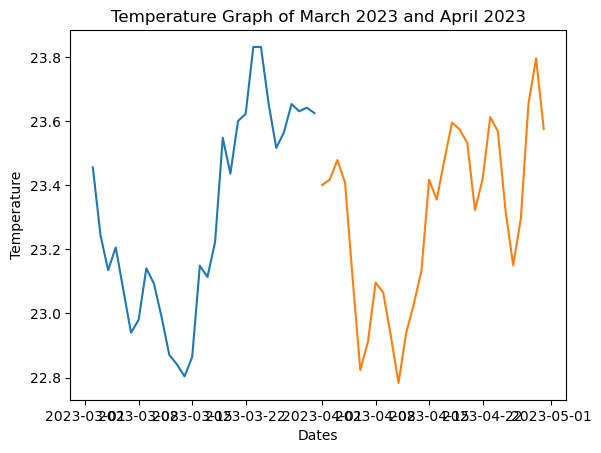

In [39]:
plt.title("Temperature Graph of March 2023 and April 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

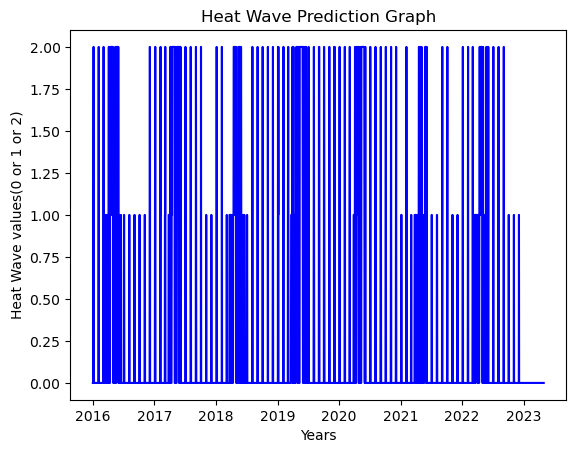

In [40]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [41]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-04-26,23.150649
2023-04-27,23.295738
2023-04-28,23.654019
2023-04-29,23.796842
2023-04-30,23.575729


# Predictions for May

In [42]:
#Since May has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. May 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2677
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5692.514
Date:                          Sat, 04 Mar 2023   AIC                          11397.027
Time:                                  19:58:42   BIC                          11432.310
Sample:                              01-01-2016   HQIC                         11409.800
                                   - 04-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6560      0.016     41.277      0.000       0.625       0.687
ar.L2         -0.0596      0.016     -3.660      0.000      -0.091      -0.028
ma.L1         -0.9518      0.006   -148.853      0.000      -0.964      -0.939
ar.S.L31       0.5159      0.015     33.611      0.000       0.486       0.546
ma.S.L31      -0.9998      1.578     -0.633      0.526      -4.094       2.094
sigma2         4.1661      6.545      0.636      0.524      -8.663      16.995
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5930.30
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of May 2023 are:",pred_new)

The predicted Temperature values of each day of May 2023 are: 2023-05-01    23.411593
2023-05-02    23.312952
2023-05-03    23.248751
2023-05-04    23.286926
2023-05-05    23.165131
2023-05-06    23.106485
2023-05-07    22.995553
2023-05-08    22.975718
2023-05-09    23.201035
2023-05-10    23.471156
2023-05-11    23.340491
2023-05-12    23.300874
2023-05-13    23.296017
2023-05-14    23.250414
2023-05-15    23.246308
2023-05-16    23.398466
2023-05-17    23.482628
2023-05-18    23.491343
2023-05-19    23.480101
2023-05-20    23.581991
2023-05-21    23.492939
2023-05-22    23.292223
2023-05-23    23.426410
2023-05-24    23.674151
2023-05-25    23.588066
2023-05-26    23.246492
2023-05-27    22.949751
2023-05-28    23.073776
2023-05-29    23.265230
2023-05-30    23.471160
2023-05-31    23.512666
Freq: D, Name: predicted_mean, dtype: float64


In [44]:
#Combining the pred May2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

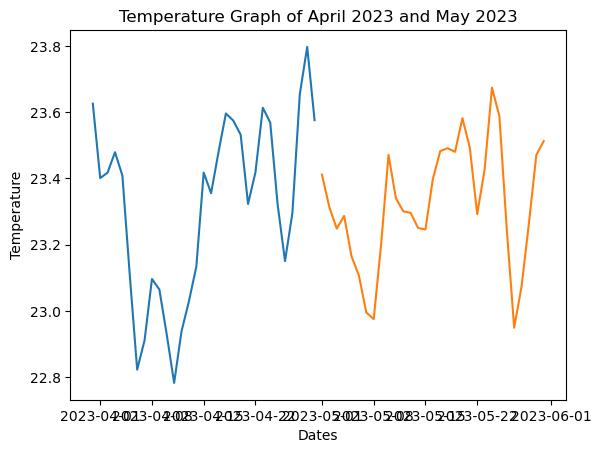

In [45]:
plt.title("Temperature Graph of April 2023 and May 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

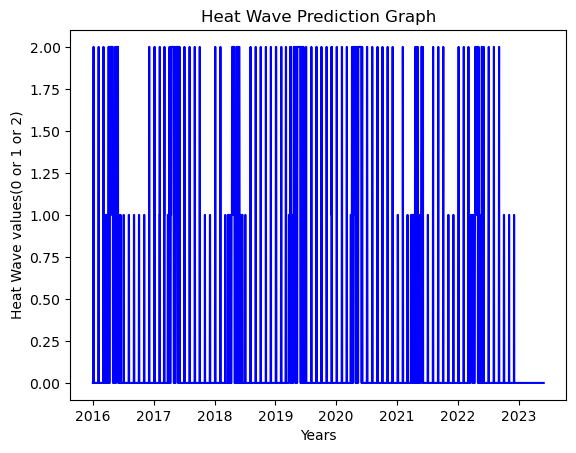

In [46]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [47]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-05-27,22.949751
2023-05-28,23.073776
2023-05-29,23.265230
2023-05-30,23.471160
2023-05-31,23.512666


# Predictions for June

In [48]:
#Since June has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. June 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2708
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -5858.187
Date:                          Sat, 04 Mar 2023   AIC                          11728.374
Time:                                  20:02:55   BIC                          11763.728
Sample:                              01-01-2016   HQIC                         11741.165
                                   - 05-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6518      0.015     44.205      0.000       0.623       0.681
ar.L2         -0.0675      0.020     -3.413      0.001      -0.106      -0.029
ma.L1         -0.9517      0.007   -135.134      0.000      -0.966      -0.938
ar.S.L30       0.4448      0.013     35.233      0.000       0.420       0.470
ma.S.L30      -0.9998      1.704     -0.587      0.557      -4.341       2.341
sigma2         4.4748      7.623      0.587      0.557     -10.465      19.415
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4952.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-06-01    23.528336
2023-06-02    23.565103
2023-06-03    23.457419
2023-06-04    23.151504
2023-06-05    22.895973
2023-06-06    22.910983
2023-06-07    23.011608
2023-06-08    23.103454
2023-06-09    23.138042
2023-06-10    22.986183
2023-06-11    23.134415
2023-06-12    23.238147
2023-06-13    23.293162
2023-06-14    23.445334
2023-06-15    23.469153
2023-06-16    23.580983
2023-06-17    23.556752
2023-06-18    23.579716
2023-06-19    23.511948
2023-06-20    23.255700
2023-06-21    23.166446
2023-06-22    23.419094
2023-06-23    23.566095
2023-06-24    23.344573
2023-06-25    22.999096
2023-06-26    22.967697
2023-06-27    23.387069
2023-06-28    23.610071
2023-06-29    23.493532
2023-06-30    23.426726
Freq: D, Name: predicted_mean, dtype: float64


In [50]:
#Combining the pred June2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

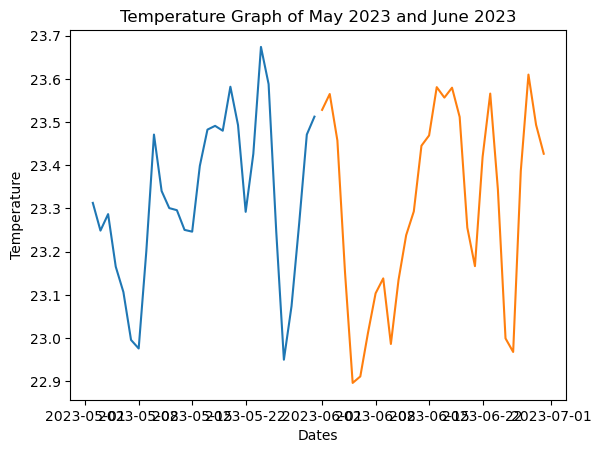

In [51]:
plt.title("Temperature Graph of May 2023 and June 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])
    

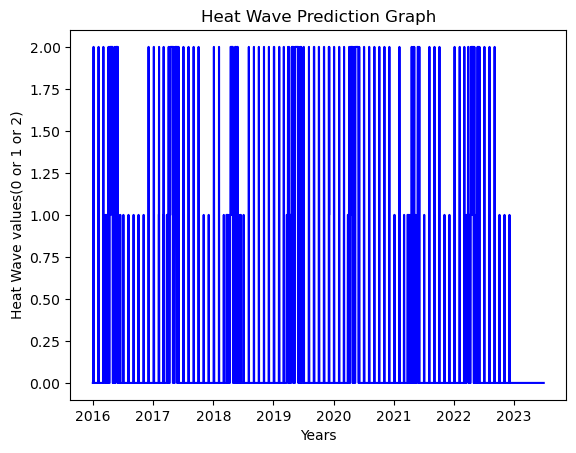

In [52]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [53]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-06-26,22.967697
2023-06-27,23.387069
2023-06-28,23.610071
2023-06-29,23.493532
2023-06-30,23.426726


# Predictions for July

In [54]:
#Since July has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. July 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2738
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5792.305
Date:                          Sat, 04 Mar 2023   AIC                          11596.611
Time:                                  20:09:20   BIC                          11632.030
Sample:                              01-01-2016   HQIC                         11609.418
                                   - 06-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6560      0.016     42.219      0.000       0.626       0.686
ar.L2         -0.0595      0.016     -3.740      0.000      -0.091      -0.028
ma.L1         -0.9519      0.006   -152.609      0.000      -0.964      -0.940
ar.S.L31       0.5156      0.015     34.367      0.000       0.486       0.545
ma.S.L31      -0.9998      1.405     -0.711      0.477      -3.754       1.754
sigma2         4.0743      5.696      0.715      0.474      -7.090      15.238
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6454.85
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of July 2023 are:",pred_new)

The predicted Temperature values of each day of July 2023 are: 2023-07-01    23.540607
2023-07-02    23.402952
2023-07-03    23.425799
2023-07-04    23.287597
2023-07-05    23.127149
2023-07-06    22.905656
2023-07-07    23.007793
2023-07-08    23.096041
2023-07-09    23.079249
2023-07-10    23.224383
2023-07-11    23.426101
2023-07-12    23.444997
2023-07-13    23.535143
2023-07-14    23.479862
2023-07-15    23.468805
2023-07-16    23.424147
2023-07-17    23.487796
2023-07-18    23.589461
2023-07-19    23.547025
2023-07-20    23.440680
2023-07-21    23.416864
2023-07-22    23.303982
2023-07-23    23.346225
2023-07-24    23.506787
2023-07-25    23.534576
2023-07-26    23.290667
2023-07-27    23.064146
2023-07-28    23.080420
2023-07-29    23.245821
2023-07-30    23.189918
2023-07-31    23.284441
Freq: D, Name: predicted_mean, dtype: float64


In [56]:
#Combining the pred July2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

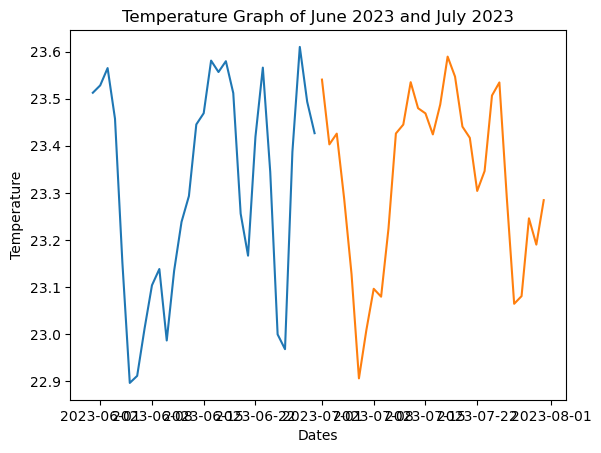

In [57]:
plt.title("Temperature Graph of June 2023 and July 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

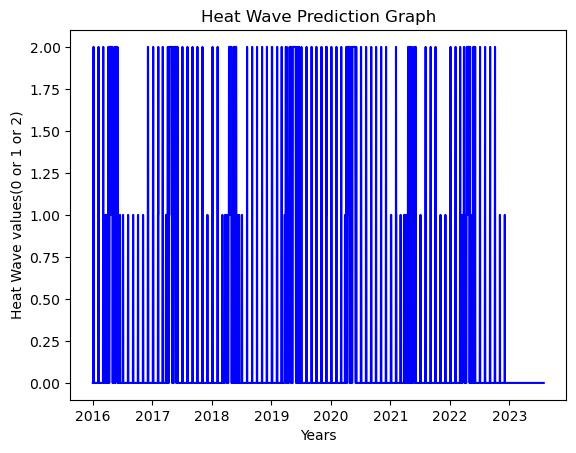

In [58]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [59]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-07-27,23.064146
2023-07-28,23.080420
2023-07-29,23.245821
2023-07-30,23.189918
2023-07-31,23.284441


# Predictions for August

In [60]:
#Since August has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. August 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2769
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5842.639
Date:                          Sat, 04 Mar 2023   AIC                          11697.277
Time:                                  20:17:19   BIC                          11732.765
Sample:                              01-01-2016   HQIC                         11710.102
                                   - 07-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6563      0.015     42.740      0.000       0.626       0.686
ar.L2         -0.0597      0.016     -3.800      0.000      -0.091      -0.029
ma.L1         -0.9519      0.006   -154.447      0.000      -0.964      -0.940
ar.S.L31       0.5154      0.015     34.768      0.000       0.486       0.545
ma.S.L31      -0.9998      1.354     -0.738      0.460      -3.654       1.655
sigma2         4.0267      5.425      0.742      0.458      -6.606      14.659
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6739.10
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-08-01    23.498157
2023-08-02    23.304447
2023-08-03    23.331490
2023-08-04    23.183641
2023-08-05    23.101553
2023-08-06    22.899434
2023-08-07    23.047509
2023-08-08    23.129916
2023-08-09    23.057380
2023-08-10    23.259699
2023-08-11    23.643904
2023-08-12    23.596136
2023-08-13    23.679304
2023-08-14    23.567137
2023-08-15    23.471884
2023-08-16    23.391902
2023-08-17    23.430694
2023-08-18    23.597303
2023-08-19    23.521133
2023-08-20    23.394885
2023-08-21    23.490959
2023-08-22    23.365902
2023-08-23    23.299600
2023-08-24    23.467149
2023-08-25    23.623528
2023-08-26    23.431998
2023-08-27    23.104828
2023-08-28    22.913200
2023-08-29    23.048892
2023-08-30    23.024267
2023-08-31    23.202010
Freq: D, Name: predicted_mean, dtype: float64


In [62]:
#Combining the pred August2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

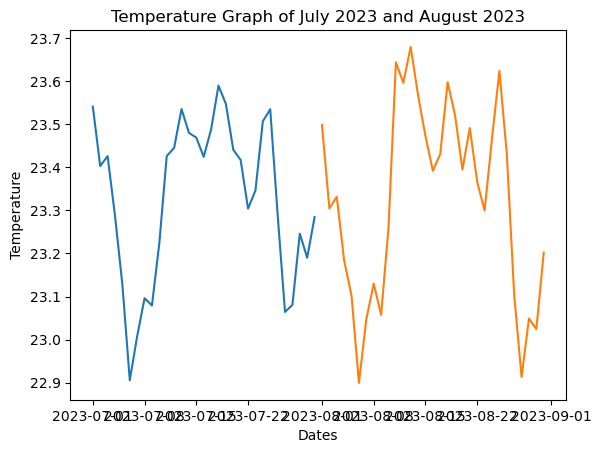

In [63]:
plt.title("Temperature Graph of July 2023 and August 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

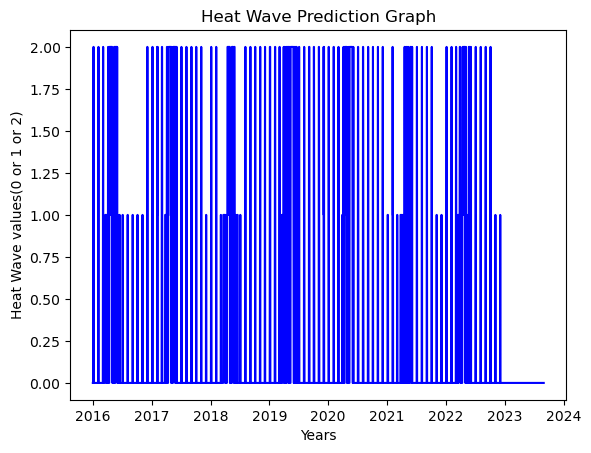

In [64]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [65]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-08-27,23.104828
2023-08-28,22.913200
2023-08-29,23.048892
2023-08-30,23.024267
2023-08-31,23.202010


# Predictions for September

In [66]:
#Since Saptember has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. September 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2800
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6011.665
Date:                          Sat, 04 Mar 2023   AIC                          12035.331
Time:                                  20:20:32   BIC                          12070.888
Sample:                              01-01-2016   HQIC                         12048.173
                                   - 08-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6521      0.014     45.750      0.000       0.624       0.680
ar.L2         -0.0677      0.019     -3.540      0.000      -0.105      -0.030
ma.L1         -0.9518      0.007   -140.010      0.000      -0.965      -0.938
ar.S.L30       0.4444      0.012     36.415      0.000       0.420       0.468
ma.S.L30      -0.9999      2.371     -0.422      0.673      -5.648       3.648
sigma2         4.3273     10.257      0.422      0.673     -15.776      24.430
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5625.58
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-09-01    23.161707
2023-09-02    23.037282
2023-09-03    22.805264
2023-09-04    22.861173
2023-09-05    22.893104
2023-09-06    22.961013
2023-09-07    22.918951
2023-09-08    22.798049
2023-09-09    23.054296
2023-09-10    23.333104
2023-09-11    23.385754
2023-09-12    23.573596
2023-09-13    23.479512
2023-09-14    23.508301
2023-09-15    23.444882
2023-09-16    23.490420
2023-09-17    23.455511
2023-09-18    23.209226
2023-09-19    23.152101
2023-09-20    23.382989
2023-09-21    23.361698
2023-09-22    23.153952
2023-09-23    23.042293
2023-09-24    23.210700
2023-09-25    23.477138
2023-09-26    23.462434
2023-09-27    23.172880
2023-09-28    23.151047
2023-09-29    23.233628
2023-09-30    23.413904
Freq: D, Name: predicted_mean, dtype: float64


In [68]:
#Combining the pred September2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

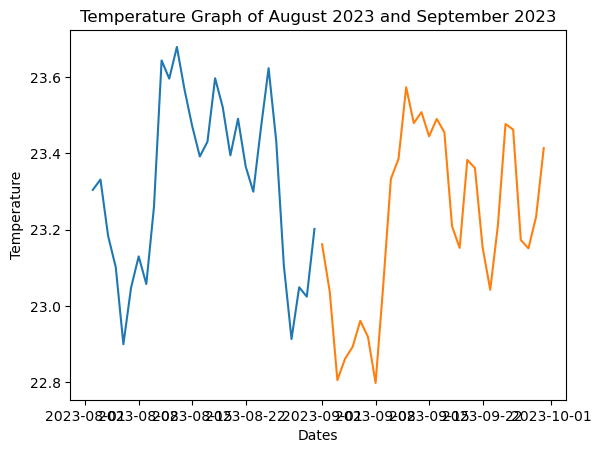

In [69]:
plt.title("Temperature Graph of August 2023 and September 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")

plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

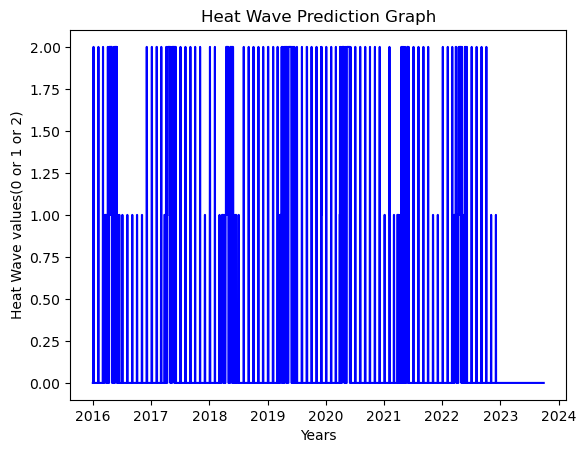

In [70]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [71]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-09-26,23.462434
2023-09-27,23.172880
2023-09-28,23.151047
2023-09-29,23.233628
2023-09-30,23.413904


# Prediction for October

In [72]:
#Since October has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. October 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2830
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5941.315
Date:                          Sat, 04 Mar 2023   AIC                          11894.631
Time:                                  20:26:16   BIC                          11930.251
Sample:                              01-01-2016   HQIC                         11907.489
                                   - 09-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6564      0.015     43.698      0.000       0.627       0.686
ar.L2         -0.0596      0.015     -3.876      0.000      -0.090      -0.029
ma.L1         -0.9519      0.006   -158.076      0.000      -0.964      -0.940
ar.S.L31       0.5153      0.014     35.540      0.000       0.487       0.544
ma.S.L31      -0.9998      1.581     -0.632      0.527      -4.099       2.100
sigma2         3.9389      6.201      0.635      0.525      -8.216      16.094
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7315.96
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of October 2023 are:",pred_new)

The predicted Temperature values of each day of October 2023 are: 2023-10-01    23.450178
2023-10-02    23.448958
2023-10-03    23.187280
2023-10-04    23.038300
2023-10-05    22.969728
2023-10-06    22.974999
2023-10-07    22.917906
2023-10-08    22.985633
2023-10-09    22.956054
2023-10-10    23.026886
2023-10-11    23.297990
2023-10-12    23.600556
2023-10-13    23.642527
2023-10-14    23.628804
2023-10-15    23.561704
2023-10-16    23.440211
2023-10-17    23.408212
2023-10-18    23.395543
2023-10-19    23.378098
2023-10-20    23.294737
2023-10-21    23.346187
2023-10-22    23.441684
2023-10-23    23.266935
2023-10-24    23.121393
2023-10-25    23.292952
2023-10-26    23.572800
2023-10-27    23.500968
2023-10-28    23.142231
2023-10-29    22.933856
2023-10-30    23.026465
2023-10-31    23.125551
Freq: D, Name: predicted_mean, dtype: float64


In [74]:
#Combining the pred October2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

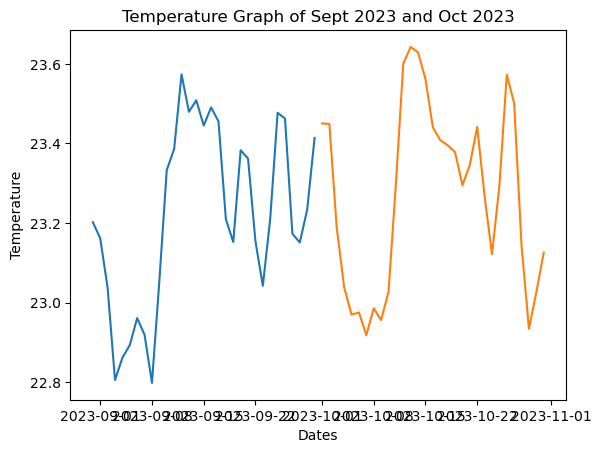

In [75]:
plt.title("Temperature Graph of Sept 2023 and Oct 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

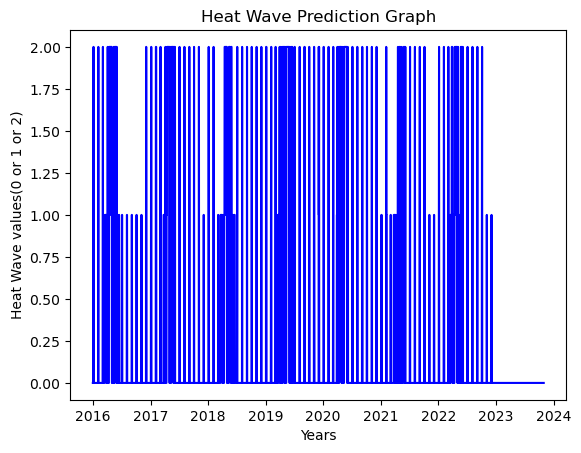

In [76]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [77]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-10-27,23.500968
2023-10-28,23.142231
2023-10-29,22.933856
2023-10-30,23.026465
2023-10-31,23.125551


# Prediction for November

In [78]:
#Since November has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. Nomvember 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2861
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6112.507
Date:                          Sat, 04 Mar 2023   AIC                          12237.014
Time:                                  20:28:17   BIC                          12272.702
Sample:                              01-01-2016   HQIC                         12249.889
                                   - 10-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6523      0.014     46.775      0.000       0.625       0.680
ar.L2         -0.0678      0.019     -3.627      0.000      -0.105      -0.031
ma.L1         -0.9517      0.007   -143.134      0.000      -0.965      -0.939
ar.S.L30       0.4442      0.012     37.206      0.000       0.421       0.468
ma.S.L30      -0.9999      1.915     -0.522      0.602      -4.753       2.754
sigma2         4.2340      8.104      0.522      0.601     -11.650      20.118
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6106.06
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of November 2023 are:",pred_new)

The predicted Temperature values of each day of November 2023 are: 2023-11-01    23.029035
2023-11-02    22.769102
2023-11-03    22.804734
2023-11-04    22.900343
2023-11-05    22.907838
2023-11-06    22.805912
2023-11-07    22.750368
2023-11-08    22.900904
2023-11-09    23.039052
2023-11-10    23.235316
2023-11-11    23.521433
2023-11-12    23.497184
2023-11-13    23.561247
2023-11-14    23.503448
2023-11-15    23.476038
2023-11-16    23.353775
2023-11-17    23.138816
2023-11-18    23.130145
2023-11-19    23.277529
2023-11-20    23.334962
2023-11-21    23.202753
2023-11-22    22.939543
2023-11-23    22.970564
2023-11-24    23.395416
2023-11-25    23.652071
2023-11-26    23.418394
2023-11-27    23.174151
2023-11-28    23.171699
2023-11-29    23.313254
2023-11-30    23.259947
Freq: D, Name: predicted_mean, dtype: float64


In [80]:
#Combining the pred November2023 data with the original dataset


res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

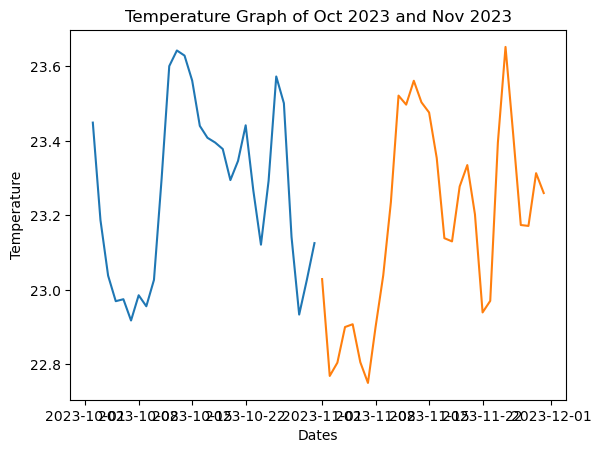

In [81]:

plt.title("Temperature Graph of Oct 2023 and Nov 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

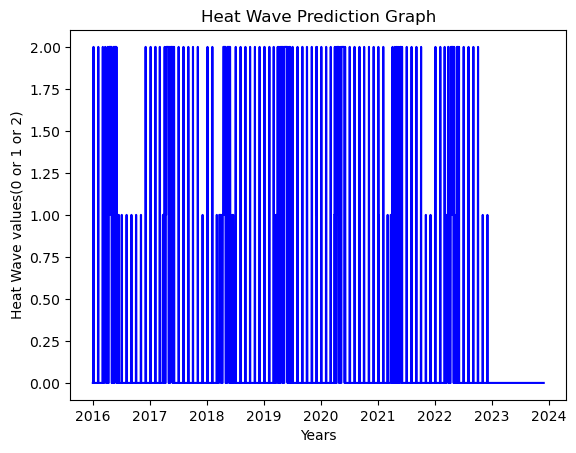

In [82]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [83]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-11-26,23.418394
2023-11-27,23.174151
2023-11-28,23.171699
2023-11-29,23.313254
2023-11-30,23.259947


# Prediction for December

In [84]:
#Since December has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. December 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2891
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6039.369
Date:                          Sat, 04 Mar 2023   AIC                          12090.738
Time:                                  20:31:05   BIC                          12126.488
Sample:                              01-01-2016   HQIC                         12103.629
                                   - 11-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6565      0.015     44.647      0.000       0.628       0.685
ar.L2         -0.0599      0.015     -3.978      0.000      -0.089      -0.030
ma.L1         -0.9519      0.006   -161.333      0.000      -0.963      -0.940
ar.S.L31       0.5152      0.014     36.312      0.000       0.487       0.543
ma.S.L31      -0.9999      1.881     -0.531      0.595      -4.687       2.687
sigma2         3.8553      7.227      0.533      0.594     -10.309      18.020
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7925.31
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of December 2023 are:",pred_new)

The predicted Temperature values of each day of December 2023 are: 2023-12-01    23.161293
2023-12-02    23.142868
2023-12-03    23.103199
2023-12-04    22.973589
2023-12-05    23.020950
2023-12-06    22.942852
2023-12-07    22.885832
2023-12-08    22.770004
2023-12-09    22.939546
2023-12-10    23.045966
2023-12-11    23.088872
2023-12-12    23.364317
2023-12-13    23.622736
2023-12-14    23.602050
2023-12-15    23.606200
2023-12-16    23.511101
2023-12-17    23.359605
2023-12-18    23.191899
2023-12-19    23.192676
2023-12-20    23.378578
2023-12-21    23.355856
2023-12-22    23.219261
2023-12-23    23.185753
2023-12-24    23.136012
2023-12-25    23.272965
2023-12-26    23.490852
2023-12-27    23.507643
2023-12-28    23.316056
2023-12-29    23.109285
2023-12-30    22.989699
2023-12-31    23.010735
Freq: D, Name: predicted_mean, dtype: float64


In [86]:
#Combining the pred December2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

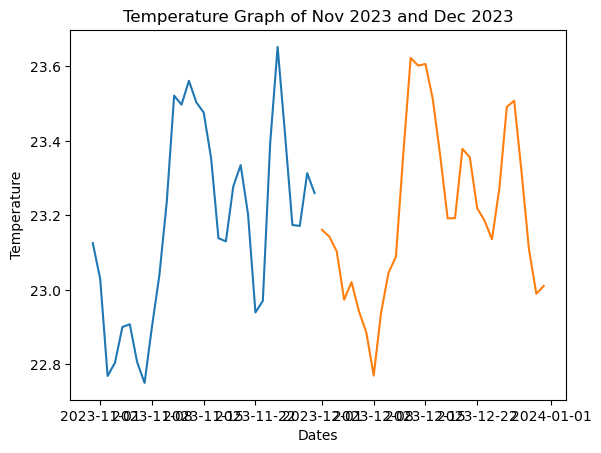

In [87]:
plt.title("Temperature Graph of Nov 2023 and Dec 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

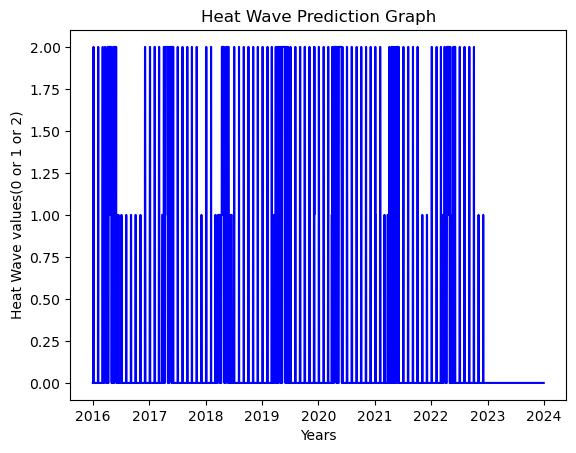

In [88]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [89]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-12-27,23.507643
2023-12-28,23.316056
2023-12-29,23.109285
2023-12-30,22.989699
2023-12-31,23.010735


In [90]:
print("The Average Mean Average Error across all 5 cities is:",1.7294)
print("The model fits the city of Khammam the best a we got the least AME value of",1.44896492)

The Average Mean Average Error across all 5 cities is: 1.7294
The model fits the city of Khammam the best a we got the least AME value of 1.44896492
